# Lab3 - Univariate Linear Regression on the Scikit-Learn Diabetes Dataset

In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

df = datasets.load_diabetes(as_frame=True)
df['data'].head()



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [94]:
df['data'].describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [95]:
X, y = df['data'], df['target']
X.head(), X['bmi'], y, type(y)

(        age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  
 0 -0.002592  0.019907 -0.017646  
 1 -0.039493 -0.068332 -0.092204  
 2 -0.002592  0.002861 -0.025930  
 3  0.034309  0.022688 -0.009362  
 4 -0.002592 -0.031988 -0.046641  ,
 0      0.061696
 1     -0.051474
 2      0.044451
 3     -0.011595
 4     -0.036385
          ...   
 437    0.019662
 438   -0.015906
 439   -0.015906
 440    0.039062
 441   -0.073030
 Name: bmi, Length: 442, dtype: float64,
 0      151.0
 1       75.0
 2      141.0
 3      206.0
 4      135.0
        ...  
 437    178.0
 438 

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X['bmi'].to_numpy().reshape(-1, 1), y, test_size=0.3)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

model.score(x_test, y_test)



0.4413217665875072

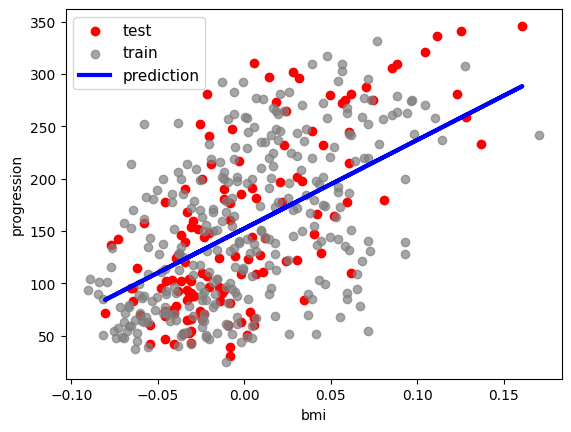

In [97]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test,  color='red', label='test')
plt.scatter(x_train, y_train, facecolor='gray', alpha=0.7, label='train')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='prediction')
plt.ylabel("progression")
plt.xlabel("bmi")
plt.legend(facecolor='white', fontsize=11)
plt.show()

In [98]:
import numpy as np
# slope, intercept, MAE, MSE
# since y = m*x + c, when x is 0, y == c; when x is 1, y == m + c
res = model.predict(np.array([[0], [1]]))
c = res[0]
m = res[1] - c
print("slope", m)
print("intercept", c)
# we can also get slope and intercept through bultin attributes
# print("slope by coef_", clf.coef_[0])
# print("intercept by intercept_", clf.intercept_)

from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("MSE", mse)
print("MAE", mae)

slope 845.8501607345805
intercept 152.41227950448786
MSE 3726.278770572428
MAE 51.703265044902615


# This is not a good model, r2 score is not strong, the errors are large